<a href="https://colab.research.google.com/github/RoseSarlake/deep-learning/blob/main/DL_exe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 26 19:04:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2769024   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
model1.compile(optimizer,loss_object,metrics=['accuracy'])

In [ ]:
history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6974 - accuracy: 0.9393 - val_loss: 0.1199 - val_accuracy: 0.9653
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0757 - accuracy: 0.9766 - val_loss: 0.1040 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.1137 - val_accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0446 - accuracy: 0.9864 - val_loss: 0.1237 - val_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.1334 - val_accuracy: 0.9733
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0264 - accuracy: 0.9922 - val_loss: 0.1400 - val_accuracy: 0.9713
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0228 - accuracy: 0.9932 - val_loss: 0.1553 - val_ac

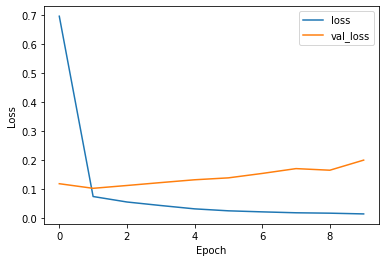

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

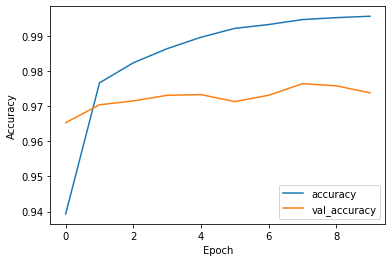

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.2012 - accuracy: 0.9738 - 923ms/epoch - 3ms/step


[0.20123742520809174, 0.973800003528595]

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(center=True, scale=True),
  tf.keras.layers.Dense(10)
])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2769024   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,771,146
Trainable params: 2,770,890
Non-trainable params: 256
__________________________________________

In [ ]:
model2.compile(optimizer,loss_object,metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0846 - accuracy: 0.9747 - val_loss: 0.0625 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0570 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0571 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0563 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0724 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0593 - val_accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0619 - val_ac

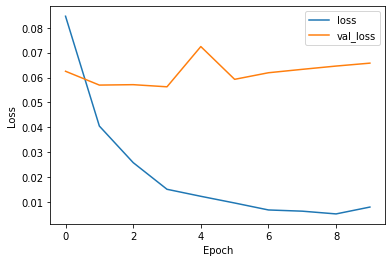

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

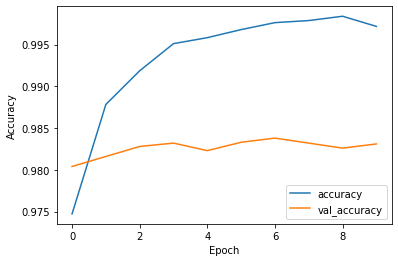

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0658 - accuracy: 0.9831 - 931ms/epoch - 3ms/step


[0.06577799469232559, 0.9830999970436096]